                                                        SIMPLE HARMONIC MOTION

Simple harmonic motion is a special type of periodic motion where the restoring force on the moving object is directly proportional to the object's displacement magnitude and acts towards the object's equilibrium position.

SHM can be modeled as sin or cosine wave moving forward with time t
Equation of SHM is:

x = A sin(𝝎t+ 𝜽)

v = A𝝎 cos(𝝎t+ 𝜽)

a = -A$\omega^2$sin(𝝎t+ 𝜽)


'We plot time t on X axis and correponding position on Y axis'

A = amplitude

𝝎 = angular frequency

𝜽 = initial phase

The differential equation of simple harmonic motion is :
$$\frac{d^2x}{dt^2} +  \omega^2x = 0$$


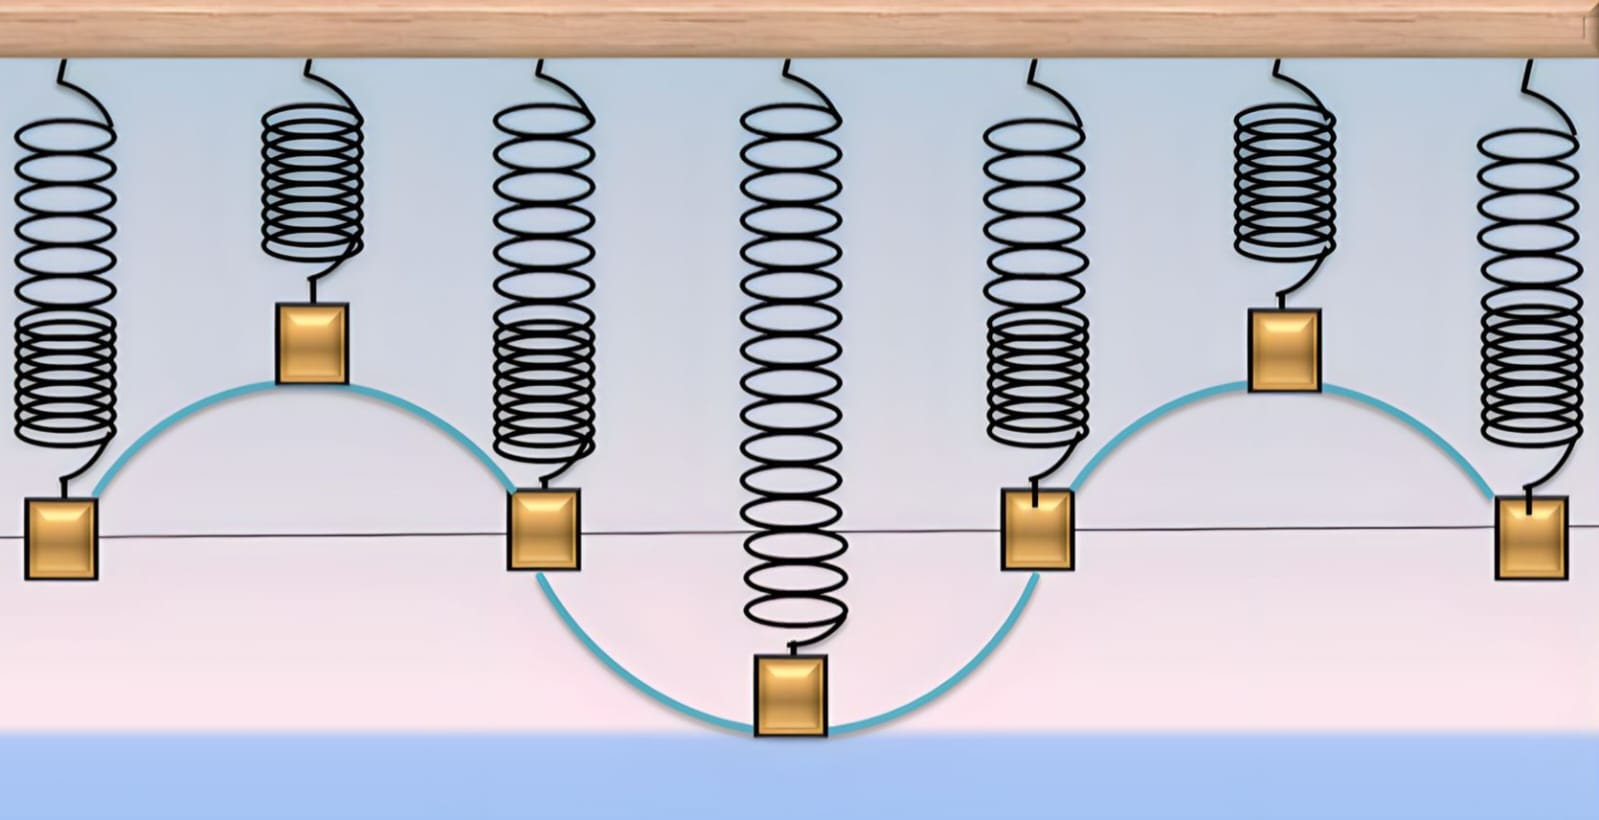

#**IMPORTING ALL MODEULES :**


import modules

equation building

numerically solve through dsolve

with initial values

numerical plot with lambdify

plotting with ode
☹



In [ ]:
import sympy as smp
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#**Declaring necessary symbols and functions:**

In [ ]:
# displaying equation

t,w = smp.symbols ('t w')   # variables t indicates time , w constant
x = smp.Function ('x')      # x is a function of x(t)
dx = x.diff (x(t),t)    # first derivative of x(t)
d2x = x.diff (x(t),t,2)   # second derivative of x(y)

eq = d2x + w**2 * x(t)

display(eq)

w**2*x(t) + Derivative(x(t), (t, 2))

In [ ]:
# solving equation numerically by dsolve

sol = smp.dsolve (eq,x(t))
display(sol)

Eq(x(t), C1*exp(-I*t*w) + C2*exp(I*t*w))

# solving the differential equation with initial conditions

In [ ]:
t = smp.symbols('t')
x = smp.Function('x')(t)  #x_is a function of t

x0, v0 = smp.symbols('x0 v0')            #  Define symbolic initial condition variables
x0, v0 = smp.symbols('x0 v0')

ic = {x.subs(t, 0): x0, x.diff(t).subs(t, 0): v0}       # Initial conditions dictionary

sol_with_ic = smp.dsolve(eq, x, ics=ic)

display(sol_with_ic)

Eq(x(t), (-I*v0 + w*x0)*exp(I*t*w)/(2*w) + (I*v0 + w*x0)*exp(-I*t*w)/(2*w))

# Numerical plotting using lambdify

We are fixing angular frequency 𝝎 = 1 , and plot the equation for different values of $x_0$

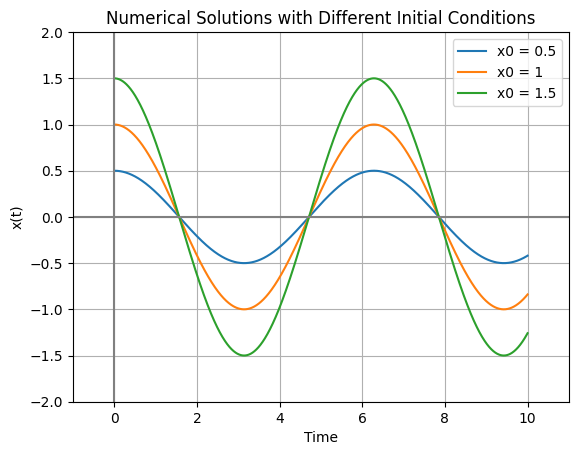

In [ ]:
x0_values = [0.5, 1, 1.5]
w_value = 1.0  #setting w constant to plot x
t_vals = np.linspace(0, 10,2000) #setting t_values (from,to,num of divisions)

for x0_val in x0_values:
    x_func = smp.lambdify(t, sol_with_ic.rhs.subs({w: w_value, x0: x0_val, v0: 0}))
    x_vals = x_func(t_vals)
    plt.plot(t_vals, x_vals, label=f'x0 = {x0_val}')

plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('Numerical Solutions with Different Initial Conditions')
plt.legend()
plt.grid()
plt.ylim(-2, 2)
plt.xlim(-1,11)
plt.axhline(y=0, c='gray')
plt.axvline(x=0, c='gray')
plt.show()

By fixing the value $\omega_0 = 1$, $x_0 = 1$ and $v_0 = 0$. We use odeint() from the scipy.integrate library to solve the differential equation numerically

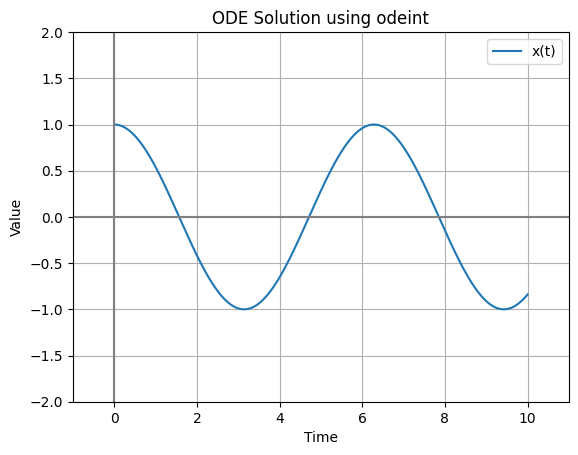

In [ ]:
# using a numerical ODE solver.

# the ODE system (as a system of first-order ODEs)

def system(y, t, w):     # y state vector [x,v] , t = time , w = frequency
    x, v = y
    dxdt = v
    dvdt = -w**2 * x
    return [dxdt, dvdt]         # returning derivative

# Parameters
w = 1.0  # Frequency parameter

# Initial conditions
x0 = 1.0                                # initial position
v0 = 0.0                                # initial velocity
initial_conditions = [x0, v0]           # append in list

# Time points for the solution
t = np.linspace(0, 10, 1000)  # Adjust time range

# Solve the ODE using odeint
solution = odeint(system, initial_conditions, t, args=(w,))

# Extract x and v values from the solution
x_vals = solution[:, 0]
v_vals = solution[:, 1]

# Plot the results
plt.plot(t, x_vals, label='x(t)')
#plt.plot(t, v_vals, label='v(t)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.ylim(-2, 2)
plt.xlim(-1,11)
plt.grid()
plt.axhline(y=0, c='gray')
plt.axvline(x=0, c='gray')
plt.title('ODE Solution using odeint')
plt.show()

We will now solve the differential equation numerically using the Euler Method for the case where we choose $\omega_0 = 0.5,1.0,1.5 $, $x_0 = 1$ and $v_0 = 0$. Then we plot for different values of $\omega$

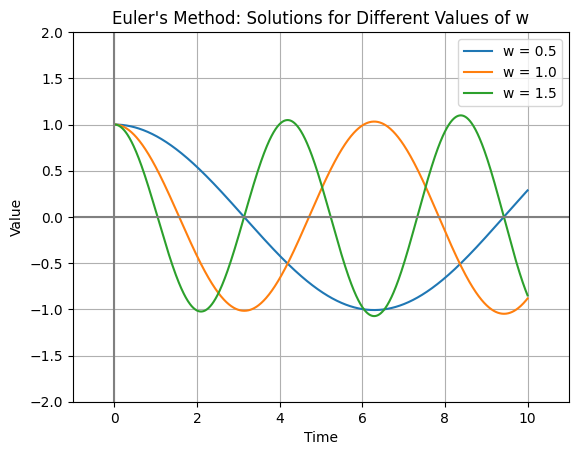

In [ ]:
def system(x, v, w):
    dxdt = v
    dvdt = -w**2 * x
    return dxdt, dvdt

def euler_method(system, initial, t, args=()):
    x_vals = [initial[0]]
    v_vals = [initial[1]]
    dt = t[1] - t[0]

    for i in range(1, len(t)):
        dxdt, dvdt = system(x_vals[i - 1], v_vals[i - 1], *args)
        x_vals.append(x_vals[i - 1] + dxdt * dt)
        v_vals.append(v_vals[i - 1] + dvdt * dt)

    return np.array(x_vals)

t = np.linspace(0, 10, 1000)
w_values = [0.5, 1.0, 1.5]

for w in w_values:
    x0 = 1.0
    v0 = 0.0
    initial = [x0, v0]

    x_vals = euler_method(system, initial, t, args=(w,))
    plt.plot(t, x_vals, label=f'w = {w}')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.legend(loc='upper right')
plt.title("Euler's Method: Solutions for Different Values of w")
plt.grid()
plt.axhline(y=0, c='gray')
plt.axvline(x=0, c='gray')
plt.ylim(-2, 2)
plt.xlim(-1,11)
plt.show()

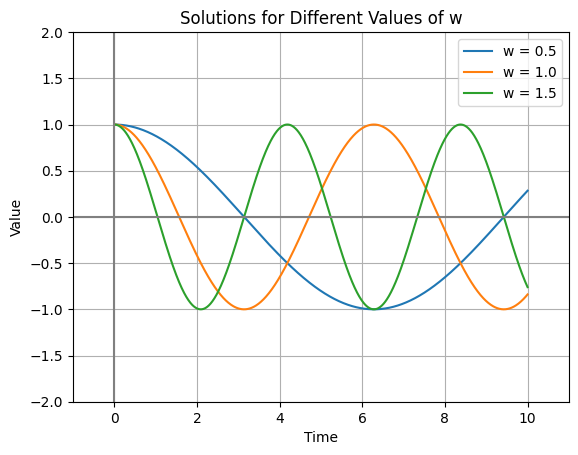

In [ ]:
# using different values of constant w

def system(y, t, w):
    x, v = y
    dxdt = v
    dvdt = -w**2 * x
    return [dxdt, dvdt]

t = np.linspace(0, 10, 1000)
w_values = [0.5, 1.0, 1.5]    # constant values

# using loop for plotting over differnent values of constant
for i in w_values :
  x0 = 1.0
  v0 = 0.0
  initial = [x0, v0]

  solution = odeint(system, initial, t, args=(i,))
  x_vals = solution[:, 0]
  plt.plot(t, x_vals, label=f'w = {i}')


plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Solutions for Different Values of w')
plt.grid()
plt.axhline(y=0, c='gray')
plt.axvline(x=0, c='gray')
plt.ylim(-2, 2)
plt.xlim(-1,11)
plt.show()

#*References:*

https://math.libretexts.org/Bookshelves/Calculus/Calculus_(OpenStax)/17%3A_Second-Order_Differential_Equations/17.03%3A_Applications_of_Second-Order_Differential_Equations

